### Perkenalan

- Nama    : I Made Dhanan Pradipta
- Batch   : 10

##### Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##### Data Loading
- pada tahap ini import dataset yang sudah ditentukan untuk dijadikan sample dalam kasus kali ini

In [2]:
#import dataset yang sudah ditentukan 
img = plt.imread("img/gambar_sample.jpg")

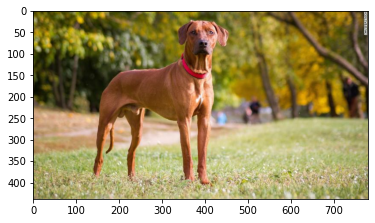

In [3]:
#visualisasikan untuk melihat dataset yang diguanakan
plt.imshow(img)
plt.show()

##### Data Preprocessing
- cari tau jenis dari image, jika image berupa 3D array, maka tahap preprocessing yaitu
mengubahnya ke bentuk 2D array,
jenis dari image apakah 3D atau 2D terletak pada nilai terakhir pada tuple hasil

In [4]:
#mengetahui shape dari image
img.shape

(438, 780, 3)

- Metode mengubah image ke 2D array, dapat menggunakan metode dengan mengubahnya image awal dipecah menjadi Red, Green dan Blue yang nantinya dapat dikalkulasikan kebentuk GRAY

In [5]:
#ubah image kedalam RGB
red = img[:,:,0]
green = img[:,:,1]
blue = img[:,:,2]

#elemen RGB ubah ke bentuk 2D array dalam bentuk gray 
grey = 0.299*red + 0.587*green + 0.114*blue

- setelah image berbentuk 2D maka dapat cari sumbu x dan ya nya

#### Image Processing
- pertama hitung vektor gradien dari masing-masing pixel dan membentuk sumbu x, y (𝜕𝑥,𝜕𝑦)

In [6]:
dx, dy = np.gradient(grey)

- kedua hitung gradien magnitude tiap pixel dengan formula di bawah

In [7]:
img_grad = np.sqrt(np.square(dx) + np.square(dy))

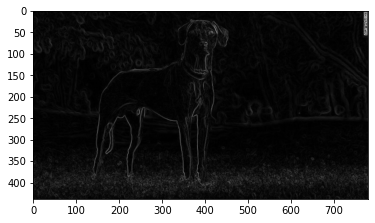

In [8]:
#visualisasikan untuk melihat bentuk image setelah dicari magnitudenya
plt.imshow(img_grad, cmap='gray')
plt.show()

- untuk mendeteksi tepi dari image sampel, dapat diukur dengan mengseleksi nilai dari magnitudenya dengan nilai threshold 

In [9]:
img_10 = img_grad.copy()
img_20 = img_grad.copy()
img_30 = img_grad.copy()

In [10]:
#fungsi untuk mendeteksi tepi image menggunakan threshold yang telah ditentukan
def img_thres(img, t):
    img_thres = img
    img_thres[~(img_thres > t)] = 0
    return img_thres

- untuk perkalian matriks, dapat dilakukan dengan mengalikan dengan matriks identitas dari image sampel
dengan catatan ukuran dari matriks harus sama dengan image sampel

#### Hasil dan Kesimpulan


hasil didapat dari visualisasi image sampel yang sudah dideteksi tepinya dengan nilai threshold, dan juga dengan perkalian matrix,
dari hasil tersebut dapat ditarik kesimpulan 

Text(0.5, 1.0, 'Gambar dengan t = ~ 30')

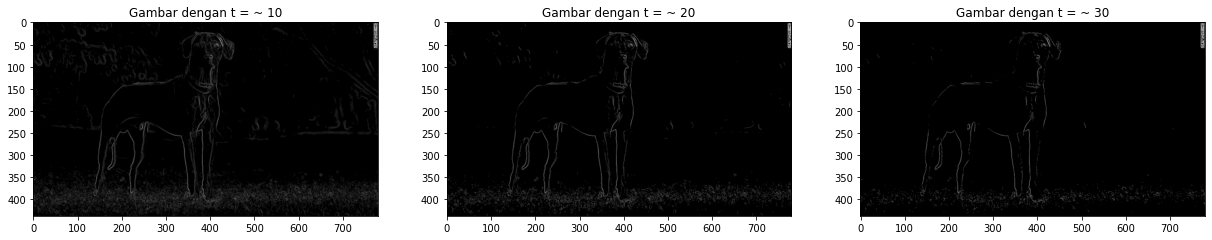

In [11]:
fig, ax = plt.subplots(ncols=3, figsize=(21,5))

ax[0].imshow(img_thres(img_10,10), cmap='gray')
ax[0].set_title('Gambar dengan t = ~ 10')

ax[1].imshow(img_thres(img_20,20), cmap='gray')
ax[1].set_title('Gambar dengan t = ~ 20')

ax[2].imshow(img_thres(img_30,30), cmap='gray')
ax[2].set_title('Gambar dengan t = ~ 30')

1. jika ditarik kesimpulan berdasarkan perbandingan nilai threshold yang digunakan untuk mendeteksi tepi dari image sampel:
- image dengan threshold = ~ 10 memiliki pendeteksian tepi yang jelas terlihat pada objek, tetapi objek dibelakanganya atau background masih terlihat 
- image dengan threshold = ~ 20, deteksi tepi terhadap objek terlihat jelas, namun garis pada objek ada sedikit tidak terlihat, namun background sudah tidak terdeteksi
- image dengan threshold = ~ 30, deteksi terlihat buram dan objek tidak terlihat jelas, sehingga bentuk dari objek tidak bisa terlihat

dan disimpulkan bahwa dengan threshold ~30 paling cocok untuk mendeteksi tepi pada image, hanya saja masih ada hal yg minor yang kurang bagus dalam pendeteksian, seperti rumput dan juga tepi objek ada beberapa yang terlihat buram, tetapi secara overall image dengan threshold = 30 lebih baik dibandingkan kedua nilai threshold lainya

In [12]:
#inspect shape dari image yang sudah diprepocessing
img_grad.shape

(438, 780)

- kalikan dengan matrix identitas untuk mendapatkan image sampel yang diinginkan dengan deteksi tepi dengan threshold ~ 20 

In [13]:
#kalikan image dengan matrix dengan formula dibawah
matrix = (-1)*np.eye(780)

#kalikan matrix dengan elemen Red, Green, dan Blue pada image awal
new_img = img_thres(img_20,20) @ matrix

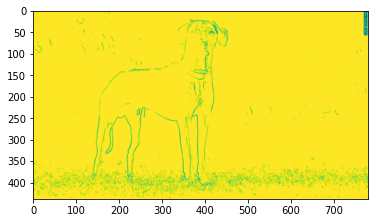

In [14]:
#visualisasikan hasil perkalian matrix dengan elemen RGB
plt.imshow(new_img)
plt.show()

2. setelah melakukan perkalian matrix dengan inverse matriks identitas, atau inverse color image
dapat dilihat bahwa deteksi tepi pada objek lebih terlihat dengan jelas karena contrast dari image yang sudah dideteksi tepi lebih cerah
dan disimpulkan bahwa fungsi dari perkalian matrik dengan image hasil adalah untuk memperjelas hasil atau proses yang ingin dicapai dalam hal ini adalah deteksi tepi